In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [59]:
import os
import json
from typing import Annotated, Literal
from typing_extensions import TypedDict
from pydantic import ValidationError
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain.chains import LLMChain
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.tools import tool
from langchain_openai import ChatOpenAI
from langchain_openai.chat_models.azure import AzureChatOpenAI
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, MessageGraph, StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt.tool_node import ToolNode
from langchain_core.messages import ToolMessage
from langchain_core.pydantic_v1 import BaseModel, Field
import getpass
import os






In [21]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI

tagging_prompt = ChatPromptTemplate.from_template(
    """
Extract the desired information from the following passage.

Only extract the properties mentioned in the 'Classification' function.

Passage:
{input}
"""

)

In [22]:
class Classification(BaseModel):
    energy: str = Field(description="What aspect of energy is this related to?")
    energy_related: int = Field(
        description="How related is this to energy from 1 to 10"
    )
    tag: str = Field(
        ..., enum=[
            "wells", "pipelines", "infrastructure", "imagery", "weather",
            "environmental", "geology", "seismic", "geomatics", "renewables",
            "emissions", "basemaps", "bathymetry"
        ]
    )
# Create an instance of Azure OpenAI
llm = AzureChatOpenAI(temperature = 0, deployment_name="gpt-4-0125-Preview").with_structured_output(
    Classification
)

tagging_chain = tagging_prompt | llm

inp = "The new geothermal plant will significantly enhance..."
tagging_chain.invoke({"input": inp})

Classification(energy='geothermal plant', energy_related=10, tag='renewables')

In [23]:
import pandas as pd

data = pd.read_csv(r"C:\Users\hqxb\Downloads\pug_export.csv")
data.head()

,title,url,type,tags,description,thumbnailUrl
0,EDW/EDW_AerialFireRetardantAvoidanceAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,To help determine areas where aerial fire reta...,https://apps.fs.usda.gov/arcx/rest/services/ED...
1,EDW/EDW_ActivityFactsCommonAttributes_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,The Forest Service's Natural Resource Manager ...,https://apps.fs.usda.gov/arcx/rest/services/ED...
2,EDW/EDW_ActivityProjectAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,"These layers, shown at all scales, display the...",https://apps.fs.usda.gov/arcx/rest/services/ED...
3,EDW/EDW_AerialFireRetardantHydrographicAvoidan...,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,Aerial retardant avoidance area for hydrograph...,https://apps.fs.usda.gov/arcx/rest/services/ED...
4,EDW/EDW_ALPStatusAndEncumbrance_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,A map service designed to portray US Forest Se...,https://apps.fs.usda.gov/arcx/rest/services/ED...


In [25]:
import pandas as pd

data["Label"] = pd.Series(dtype="int64")
data['energy']= None
data['energy_related']= None
data['tag']= None


In [28]:
#calculating the length of text
data['title_len'] = data['title'].apply(lambda x: len(str(x).split()))

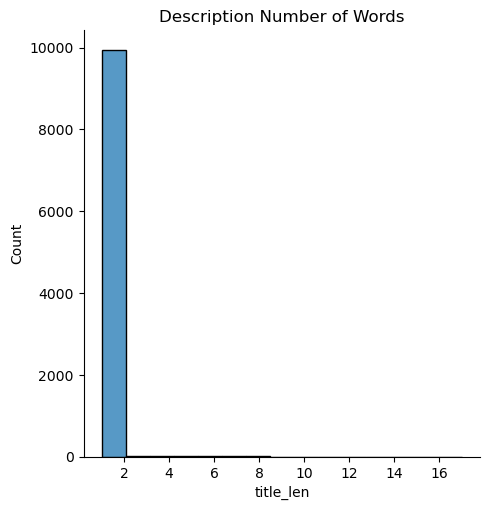

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data['title_len'])
plt.title('Description Number of Words')
plt.show()

In [30]:
data['title_str'] = data['title'].astype(str).str.replace('_',' ')

In [32]:
#calculating the length of text
data['title_str_len'] = data['title_str'].apply(lambda x: len(str(x).split()))

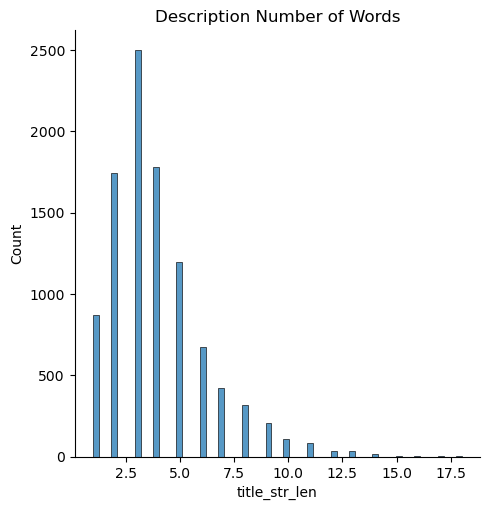

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data['title_str_len'])
plt.title('Description Number of Words')
plt.show()

In [62]:
from langchain_core.prompts import PromptTemplate

PromptTemplate = """
Act as a highly intelligent GIS chatbot and classify the titles of GIS layers and classify the titles into 1. Pipeline 2.Imagery 3. Boundries 4. Renewables 5.Other
Do not code. Return only one word answer with only the category name that the given news text belongs to

examples:

Bad:


title: {news}

"""


In [63]:
class Classification(BaseModel):
    energy: str = Field(description="What aspect of energy is this related to?")
    energy_related: int = Field(
        description="How related is this to energy from 1 to 10"
    )
    tag: str = Field(
        ..., enum=[
            "wells", "pipelines", "infrastructure", "imagery", "weather",
            "environmental", "geology", "seismic", "geomatics", "renewables",
            "emissions", "basemaps", "bathymetry"
        ]
    )
# Create an instance of Azure OpenAI
llm = AzureChatOpenAI(temperature = 0, deployment_name="gpt-4-0125-Preview").with_structured_output(
    Classification
)

tagging_chain = tagging_prompt | llm

inp = "The new geothermal plant will significantly enhance..."
tagging_chain.invoke({"input": inp})

Classification(energy='geothermal plant', energy_related=10, tag='renewables')

In [42]:
news_text = data.iloc[0]['title_str']

In [43]:
news_text

'EDW/EDW AerialFireRetardantAvoidanceAreas 01'

In [44]:
tagging_chain.invoke({"input": news_text})

Classification(energy='Aerial Fire Retardant Avoidance Areas', energy_related=8, tag='environmental')

In [51]:
news_text = data.iloc[0]['title_str']
tagging_chain.invoke({"input": news_text})

title             object
url               object
type              object
tags              object
description       object
thumbnailUrl      object
Label             object
title_len          int64
title_str         object
title_str_len      int64
energy            object
energy_related    object
tag               object
dtype: object

In [ ]:
news_text = data.iloc[0]['title_str']
tagging_chain.invoke({"input": news_text})

In [54]:
data = data.head(25)

In [55]:
import pandas as pd


def tagging_function(news_text):
    result = tagging_chain.invoke({"input": news_text})
    return {
        'energy': result.energy,
        'energy_related': result.energy_related,
        'tag': result.tag
    }


for index, row in data.iterrows():
    news_text = row['title_str']
    tagging_result = tagging_function(news_text)
    data.at[index, 'energy'] = tagging_result['energy']
    data.at[index, 'energy_related'] = tagging_result['energy_related']
    data.at[index, 'tag'] = tagging_result['tag']


print(data)

                                                title  \
0        EDW/EDW_AerialFireRetardantAvoidanceAreas_01   
1            EDW/EDW_ActivityFactsCommonAttributes_01   
2                     EDW/EDW_ActivityProjectAreas_01   
3   EDW/EDW_AerialFireRetardantHydrographicAvoidan...   
4                  EDW/EDW_ALPStatusAndEncumbrance_01   
5                           EDW/EDW_BasicOwnership_01   
6                           EDW/EDW_BasicOwnership_02   
7              EDW/EDW_BaileysEcoregionsSubregions_01   
8                               EDW/EDW_CERCLASite_01   
9                            EDW/EDW_BrushDisposal_01   
10              EDW/EDW_CFLRProjectAccomplishments_01   
11               EDW/EDW_ColoradoRoadlessAreas2012_01   
12                           EDW/EDW_ClimateShield_01   
13                     EDW/EDW_CornersAndMonuments_01   
14                  EDW/EDW_CongressionalDistricts_01   
15                  EDW/EDW_CongressionalDistricts_04   
16                             

In [56]:
data.head()

,title,url,type,tags,description,thumbnailUrl,Label,title_len,title_str,title_str_len,energy,energy_related,tag
0,EDW/EDW_AerialFireRetardantAvoidanceAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,To help determine areas where aerial fire reta...,https://apps.fs.usda.gov/arcx/rest/services/ED...,NaN,1,EDW/EDW AerialFireRetardantAvoidanceAreas 01,3,EDW/EDW AerialFireRetardantAvoidanceAreas 01,5,environmental
1,EDW/EDW_ActivityFactsCommonAttributes_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,The Forest Service's Natural Resource Manager ...,https://apps.fs.usda.gov/arcx/rest/services/ED...,NaN,1,EDW/EDW ActivityFactsCommonAttributes 01,3,EDW/EDW ActivityFactsCommonAttributes 01,10,infrastructure
2,EDW/EDW_ActivityProjectAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,"These layers, shown at all scales, display the...",https://apps.fs.usda.gov/arcx/rest/services/ED...,NaN,1,EDW/EDW ActivityProjectAreas 01,3,EDW/EDW ActivityProjectAreas 01,1,infrastructure
3,EDW/EDW_AerialFireRetardantHydrographicAvoidan...,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,Aerial retardant avoidance area for hydrograph...,https://apps.fs.usda.gov/arcx/rest/services/ED...,NaN,1,EDW/EDW AerialFireRetardantHydrographicAvoidan...,3,EDW/EDW AerialFireRetardantHydrographicAvoidan...,5,environmental
4,EDW/EDW_ALPStatusAndEncumbrance_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,Map Service,USDA - Forest Service - Enterprise Data Wareho...,A map service designed to portray US Forest Se...,https://apps.fs.usda.gov/arcx/rest/services/ED...,NaN,1,EDW/EDW ALPStatusAndEncumbrance 01,3,EDW/EDW ALPStatusAndEncumbrance 01,10,infrastructure


In [64]:
data_v2 = data[['title', 'url','description','energy_related','tag']]

In [65]:
data_v2.head()

,title,url,description,energy_related,tag
0,EDW/EDW_AerialFireRetardantAvoidanceAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,To help determine areas where aerial fire reta...,5,environmental
1,EDW/EDW_ActivityFactsCommonAttributes_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,The Forest Service's Natural Resource Manager ...,10,infrastructure
2,EDW/EDW_ActivityProjectAreas_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,"These layers, shown at all scales, display the...",1,infrastructure
3,EDW/EDW_AerialFireRetardantHydrographicAvoidan...,https://apps.fs.usda.gov/arcx/rest/services/ED...,Aerial retardant avoidance area for hydrograph...,5,environmental
4,EDW/EDW_ALPStatusAndEncumbrance_01,https://apps.fs.usda.gov/arcx/rest/services/ED...,A map service designed to portray US Forest Se...,10,infrastructure


In [77]:
from langchain_core.prompts import PromptTemplate

# Define prompt
prompt_template = """Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:"""

prompt = PromptTemplate.from_template(prompt_template)

# Define LLM chain
model = AzureChatOpenAI(temperature = 0, deployment_name="gpt-4-0125-Preview")
#llm_chain = LLMChain(llm=model, prompt=prompt)

summary_chain = model | prompt


In [78]:
summary_chain

AzureChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x0000025C806364D0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x0000025C80637A30>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', azure_endpoint='https://pf-t101-openai-ussc.openai.azure.com/', deployment_name='gpt-4-0125-Preview', openai_api_version='2024-02-01', openai_api_type='azure')
| PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n"{text}"\nCONCISE SUMMARY:')

In [80]:
inp = "To help determine areas where aerial fire retardant should be avoided within USFS lands."
summary_chain.invoke({"{text}": inp})

ValueError: Invalid input type <class 'dict'>. Must be a PromptValue, str, or list of BaseMessages.